
#  How can survival analysis methods be effectively utilized to concurrently address the regression problem of predicting the duration of survival and the classification problem of ascertaining the patient's vital status  

# Contributors:
Gautham Krishna Sankar Ramalaxmi,
Sandhya Govindarajan


## Sub Task 1: Predicting Survival Outcome of Patients

In [ ]:
#Basic libraries
import numpy as np
import pandas as pd
from scipy import stats

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import yellowbrick as yb
from matplotlib.colors import ListedColormap
from yellowbrick.classifier import ROCAUC
from matplotlib_venn import venn3
import matplotlib.patches as mpatches

# Statistics, EDA, metrics libraries
from scipy.stats import normaltest, skew
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import classification_report, confusion_matrix
from scipy.special import boxcox, inv_boxcox

# Modeling libraries
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from scipy.stats import zscore
from itertools import combinations
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from IPython.display import set_matplotlib_formats
plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")


# Pallets used for visualizations
color= "Spectral"
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'
two_colors = [ sns.color_palette(color)[0], sns.color_palette(color)[5]]
three_colors = [ sns.color_palette(color)[5],sns.color_palette(color)[2], sns.color_palette(color)[0]]

In [ ]:
df = pd.read_csv("/content/METABRIC_RNA_Mutation.csv")

In [ ]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


Data cleaning- removing missing values

In [ ]:
#Finding missing data and the percentage of it in each column
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total_NaN', 'Percent_Nan'])
missing_data.head(20)

,Total_NaN,Percent_Nan
tumor_stage,501,0.263130
3-gene_classifier_subtype,204,0.107143
primary_tumor_laterality,106,0.055672
neoplasm_histologic_grade,72,0.037815
cellularity,54,0.028361
mutation_count,45,0.023634
er_status_measured_by_ihc,30,0.015756
type_of_breast_surgery,22,0.011555
tumor_size,20,0.010504
cancer_type_detailed,15,0.007878


Visualization of missing data


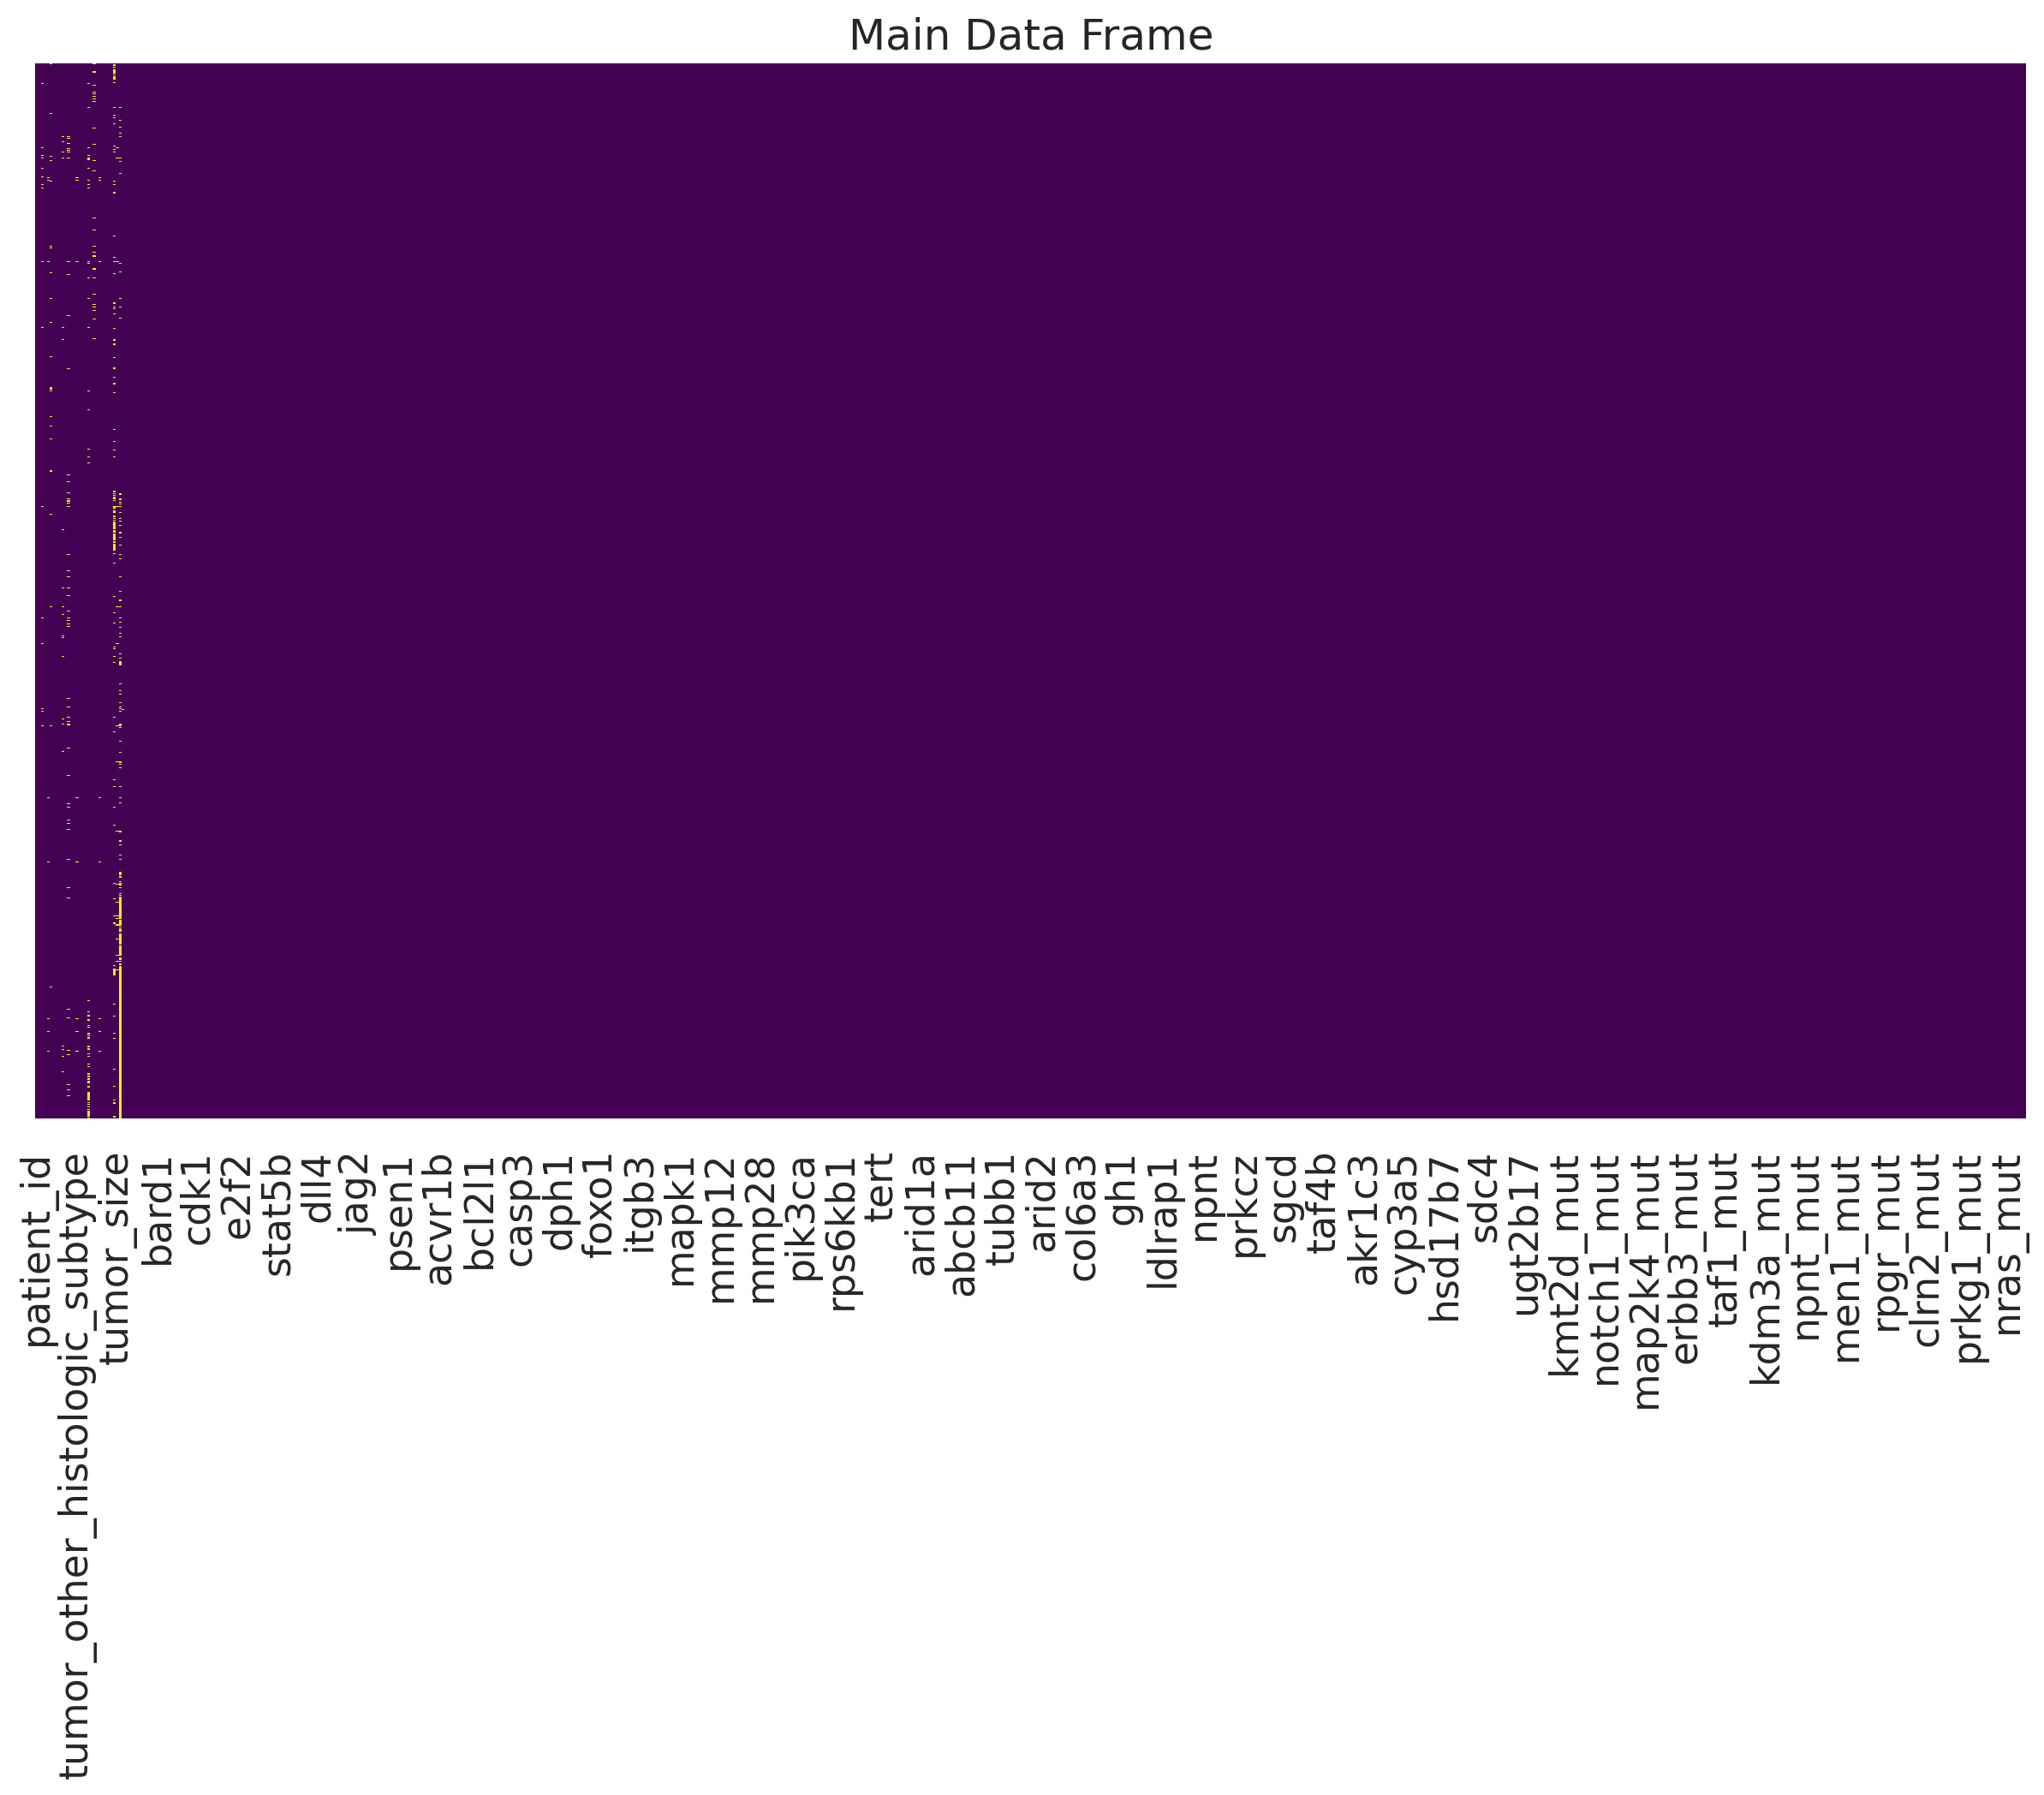

In [ ]:
fig, ax = plt.subplots( figsize = (15, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
ax.set_title('Main Data Frame')
plt.show();

We are planning to remove tumor_stage, 3-gene_classifier_subtype, primary_tumor_laterality, neoplasm_histologic_grade columns

We are planning to remove rows with null vals for neoplasm_histologic_grade, cellularity, mutation_count, er_status_measured_by_ihc, type_of_breast_surgery, tumor_size, cancer_type_detailed, oncotree_code, tumor_other_histologic_subtype, death_from_cancer

In [ ]:
lista=['cellularity','neoplasm_histologic_grade', 'mutation_count', 'er_status_measured_by_ihc', 'type_of_breast_surgery', 'tumor_size', 'cancer_type_detailed', 'oncotree_code', 'tumor_other_histologic_subtype', 'death_from_cancer']

In [ ]:
for a in lista:
  df.dropna(subset=[a], inplace=True)

In [ ]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Drop missing columns
for a in ['tumor_stage', '3-gene_classifier_subtype', 'primary_tumor_laterality', 'neoplasm_histologic_grade']:
  df = df.drop(a, axis=1)

In [ ]:
#Remove all mutation columns since they are irrelevant

columns_to_drop = [
    'pik3ca_mut', 'tp53_mut', 'muc16_mut', 'ahnak2_mut', 'kmt2c_mut', 'syne1_mut', 'gata3_mut', 'map3k1_mut',
    'ahnak_mut', 'dnah11_mut', 'cdh1_mut', 'dnah2_mut', 'kmt2d_mut', 'ush2a_mut', 'ryr2_mut', 'dnah5_mut',
    'herc2_mut', 'pde4dip_mut', 'akap9_mut', 'tg_mut', 'birc6_mut', 'utrn_mut', 'tbx3_mut', 'col6a3_mut',
    'arid1a_mut', 'lama2_mut', 'notch1_mut', 'cbfb_mut', 'ncor2_mut', 'col12a1_mut', 'col22a1_mut', 'pten_mut',
    'akt1_mut', 'atr_mut', 'thada_mut', 'ncor1_mut', 'stab2_mut', 'myh9_mut', 'runx1_mut', 'nf1_mut', 'map2k4_mut',
    'ros1_mut', 'lamb3_mut', 'arid1b_mut', 'erbb2_mut', 'sf3b1_mut', 'shank2_mut', 'ep300_mut', 'ptprd_mut',
    'usp9x_mut', 'setd2_mut', 'setd1a_mut', 'thsd7a_mut', 'afdn_mut', 'erbb3_mut', 'rb1_mut', 'myo1a_mut',
    'alk_mut', 'fanca_mut', 'adgra2_mut', 'ubr5_mut', 'pik3r1_mut', 'myo3a_mut', 'asxl2_mut', 'apc_mut', 'ctcf_mut',
    'asxl1_mut', 'fancd2_mut', 'taf1_mut', 'kdm6a_mut', 'ctnna3_mut', 'brca1_mut', 'ptprm_mut', 'foxo3_mut',
    'usp28_mut', 'gldc_mut', 'brca2_mut', 'cacna2d3_mut', 'arid2_mut', 'aff2_mut', 'lifr_mut', 'sbno1_mut',
    'kdm3a_mut', 'ncoa3_mut', 'bap1_mut', 'l1cam_mut', 'pbrm1_mut', 'chd1_mut', 'jak1_mut', 'setdb1_mut',
    'fam20c_mut', 'arid5b_mut', 'egfr_mut', 'map3k10_mut', 'smarcc2_mut', 'erbb4_mut', 'npnt_mut', 'nek1_mut',
    'agmo_mut', 'zfp36l1_mut', 'smad4_mut', 'sik1_mut', 'casp8_mut', 'prkcq_mut', 'smarcc1_mut', 'palld_mut',
    'dcaf4l2_mut', 'bcas3_mut', 'cdkn1b_mut', 'gps2_mut', 'men1_mut', 'stk11_mut', 'sik2_mut', 'ptpn22_mut',
    'brip1_mut', 'flt3_mut', 'nrg3_mut', 'fbxw7_mut', 'ttyh1_mut', 'taf4b_mut', 'or6a2_mut', 'map3k13_mut',
    'hdac9_mut', 'prkacg_mut', 'rpgr_mut', 'large1_mut', 'foxp1_mut', 'clk3_mut', 'prkcz_mut', 'lipi_mut',
    'ppp2r2a_mut', 'prkce_mut', 'gh1_mut', 'gpr32_mut', 'kras_mut', 'nf2_mut', 'chek2_mut', 'ldlrap1_mut',
    'clrn2_mut', 'acvrl1_mut', 'agtr2_mut', 'cdkn2a_mut', 'ctnna1_mut', 'magea8_mut', 'prr16_mut', 'dtwd2_mut',
    'akt2_mut', 'braf_mut', 'foxo1_mut', 'nt5e_mut', 'ccnd3_mut', 'nr3c1_mut', 'prkg1_mut', 'tbl1xr1_mut',
    'frmd3_mut', 'smad2_mut', 'sgcd_mut', 'spaca1_mut', 'rasgef1b_mut', 'hist1h2bc_mut', 'nr2f1_mut',
    'klrg1_mut', 'mbl2_mut', 'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut', 'hras_mut',
    'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'
]

df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.dtypes

patient_id                  int64
age_at_diagnosis          float64
type_of_breast_surgery     object
cancer_type                object
cancer_type_detailed       object
                           ...   
tnk2                      float64
tulp4                     float64
ugt2b15                   float64
ugt2b17                   float64
ugt2b7                    float64
Length: 516, dtype: object

In [ ]:
#Convert all the numerical columns with object datatype to numerical columns
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
1,2,43.19,0,0,1,0,0,2,1.0,1,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,5,48.87,1,0,1,0,1,3,1.0,1,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,6,47.68,1,0,4,2,1,3,1.0,1,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,8,76.97,1,0,4,0,1,3,1.0,1,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223
5,10,78.77,1,0,1,2,0,3,1.0,1,...,-0.3910,0.0395,0.8191,0.1977,-0.2302,-0.5092,-0.3021,0.9357,-0.4217,0.5340


Plotting the distribution of data points across different classes in the overall_survival column


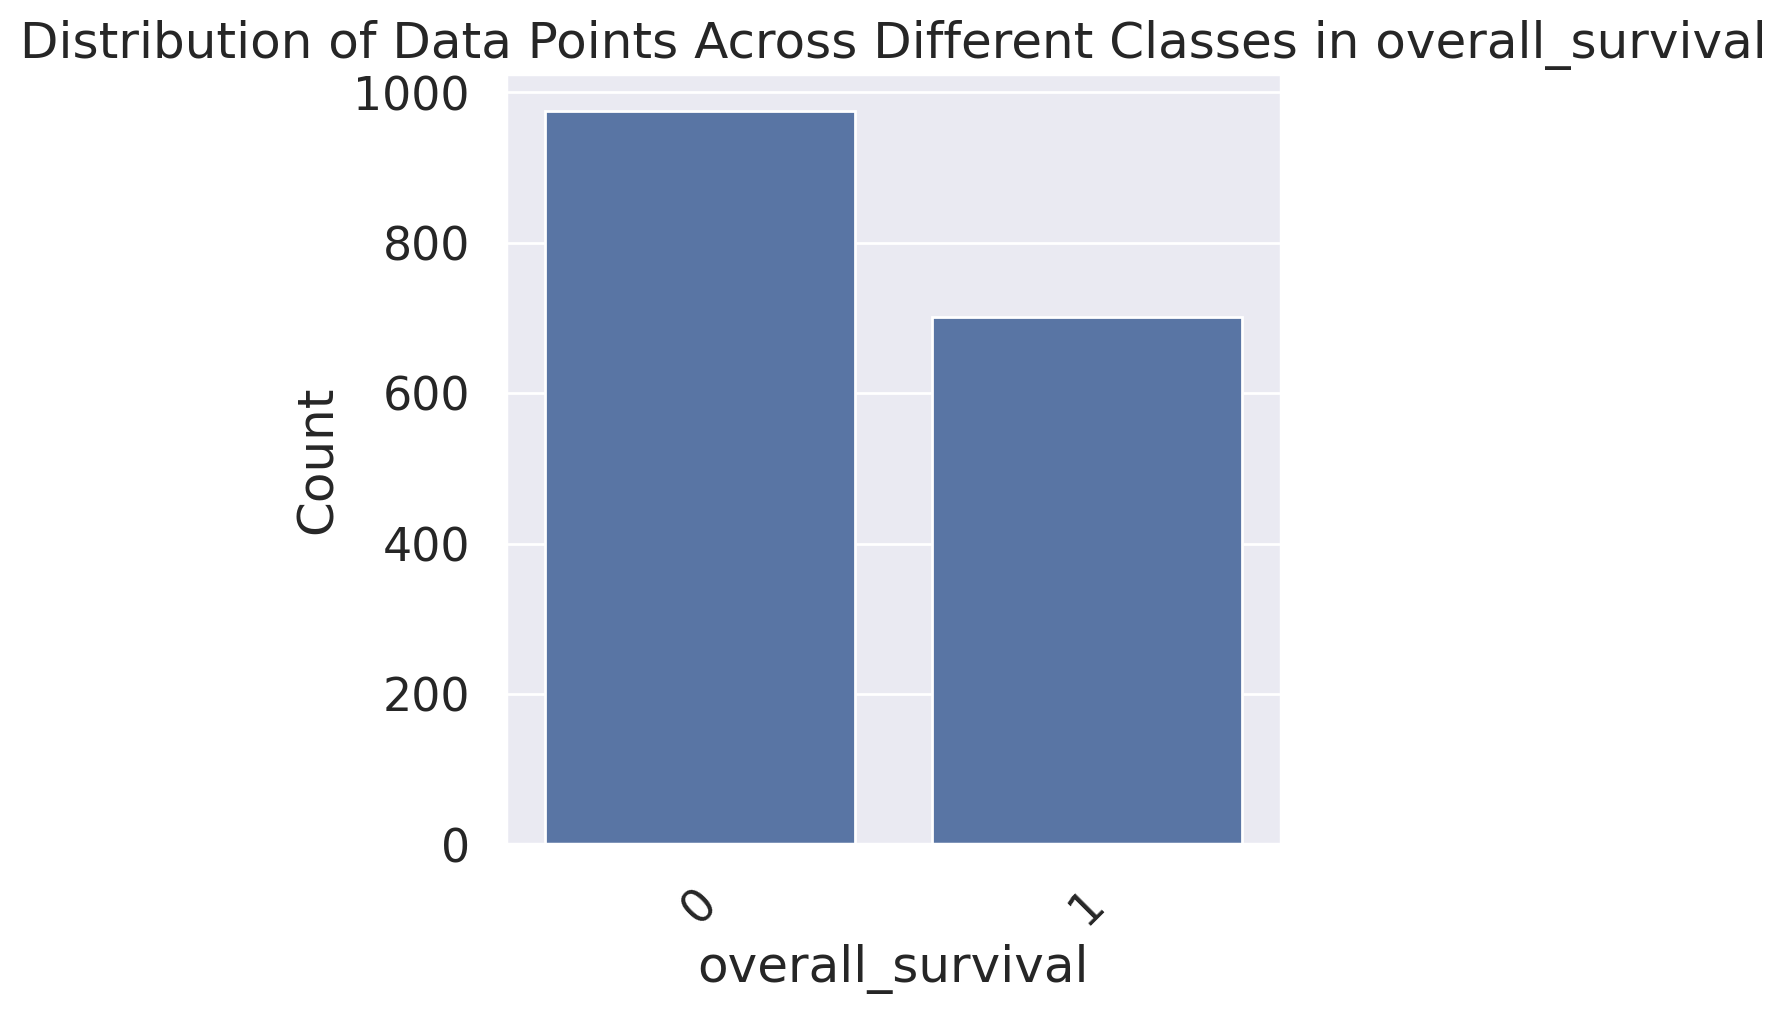

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

column_name = 'overall_survival'

plt.figure(figsize=(5, 5))
sns.countplot(x=column_name, data=df)
plt.title('Distribution of Data Points Across Different Classes in {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()



Training classification models and calulating accuracy metrics (F1 score, AUC score, confusion matrix)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

target_variable = df.columns[22]

# Split the data into features and target variable
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters grid for RandomForest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for RandomForest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='f1')

# Perform Grid Search for RandomForest
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and best score for RandomForest
print("Best Parameters for Random Forest Classifier:", rf_grid_search.best_params_)
print("Best F1 Score for Random Forest Classifier:", rf_grid_search.best_score_)

# Use the best parameters to create a new model for RandomForest
rf_best_classifier = rf_grid_search.best_estimator_
rf_best_classifier.fit(X_train, y_train)
rf_y_pred = rf_best_classifier.predict(X_test)

# Evaluate RandomForest
rf_f1_score = f1_score(y_test, rf_y_pred)
rf_auc_score = roc_auc_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Define the hyperparameters grid for Logistic Regression
logreg_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize GridSearchCV for Logistic Regression
logreg_grid_search = GridSearchCV(LogisticRegression(random_state=42), logreg_param_grid, cv=5, scoring='f1')

# Perform Grid Search for Logistic Regression
logreg_grid_search.fit(X_train, y_train)

# Get the best parameters and best score for Logistic Regression
print("Best Parameters for Logistic Regression:", logreg_grid_search.best_params_)
print("Best F1 Score for Logistic Regression:", logreg_grid_search.best_score_)

# Use the best parameters to create a new model for Logistic Regression
logreg_best_classifier = logreg_grid_search.best_estimator_
logreg_best_classifier.fit(X_train, y_train)
logreg_y_pred = logreg_best_classifier.predict(X_test)

# Evaluate Logistic Regression
logreg_f1_score = f1_score(y_test, logreg_y_pred)
logreg_auc_score = roc_auc_score(y_test, logreg_y_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_y_pred)

# Print results
print("Random Forest Classifier:")
print("F1 Score:", rf_f1_score)
print("AUC Score:", rf_auc_score)
print("Confusion Matrix:\n", rf_conf_matrix)

print("Logistic Regression:")
print("F1 Score:", logreg_f1_score)
print("AUC Score:", logreg_auc_score)
print("Confusion Matrix:\n", logreg_conf_matrix)

Best Parameters for Random Forest Classifier: {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best F1 Score for Random Forest Classifier: 0.9973645567663653
Best Parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best F1 Score for Logistic Regression: 0.9482608409669965
Random Forest Classifier:
F1 Score: 0.9961089494163424
AUC Score: 0.9961240310077519
Confusion Matrix:
 [[207   0]
 [  1 128]]
Logistic Regression:
F1 Score: 0.9692307692307692
AUC Score: 0.9762947983372654
Confusion Matrix:
 [[202   5]
 [  3 126]]


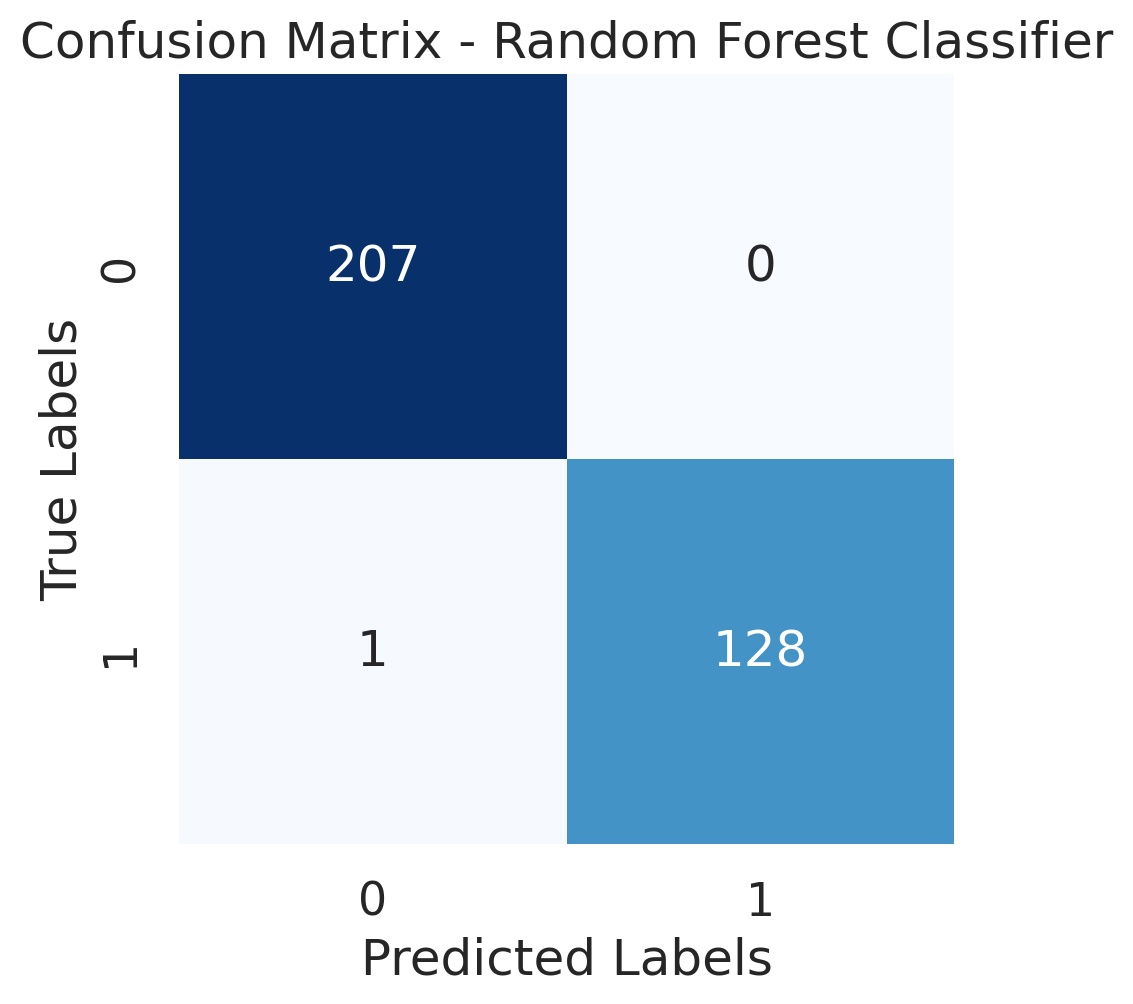

In [ ]:
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrix for Random Forest Classifier
plot_confusion_matrix(rf_conf_matrix, 'Confusion Matrix - Random Forest Classifier')


<Figure size 500x500 with 0 Axes>

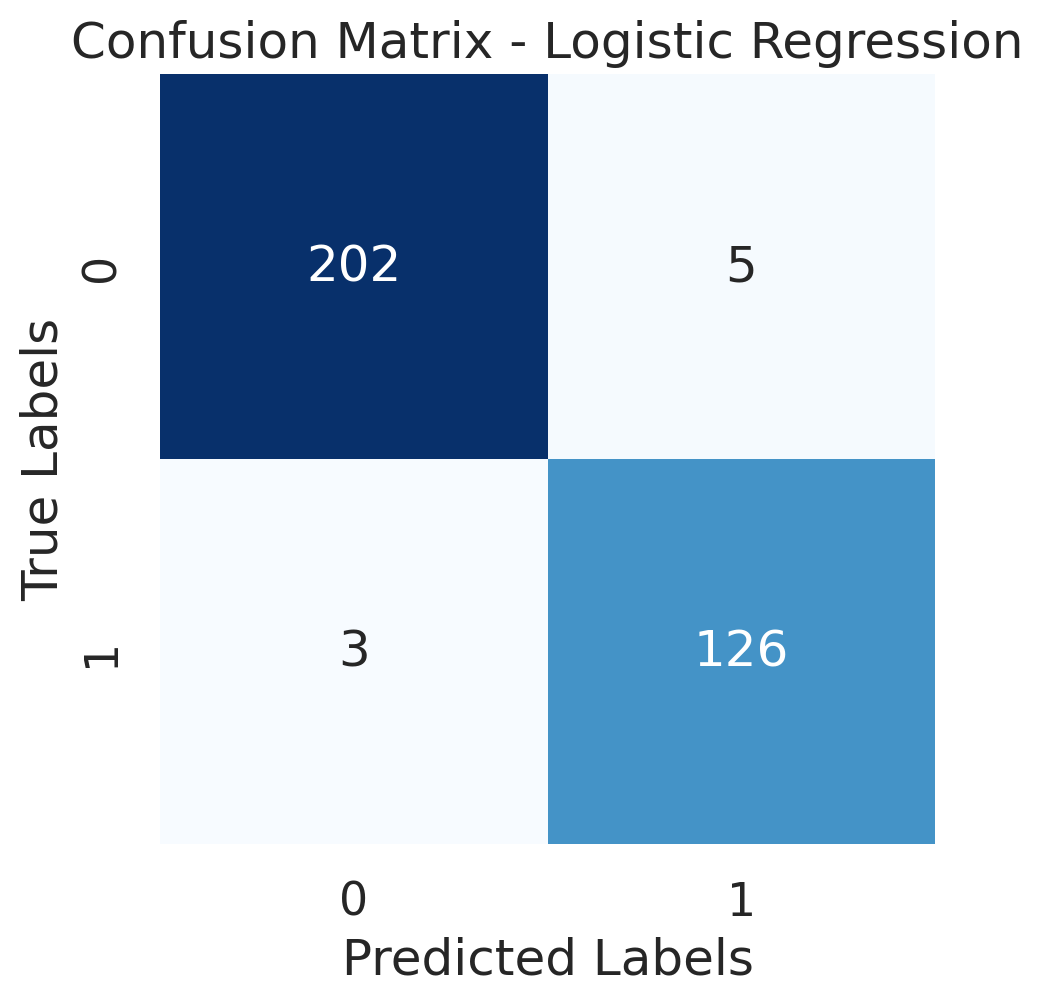

In [ ]:
# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(5, 5))
plot_confusion_matrix(logreg_conf_matrix, 'Confusion Matrix - Logistic Regression')


## Sub Task 2: Predicting duration of survival - Regression problem

Exploratory analysis of data distribution

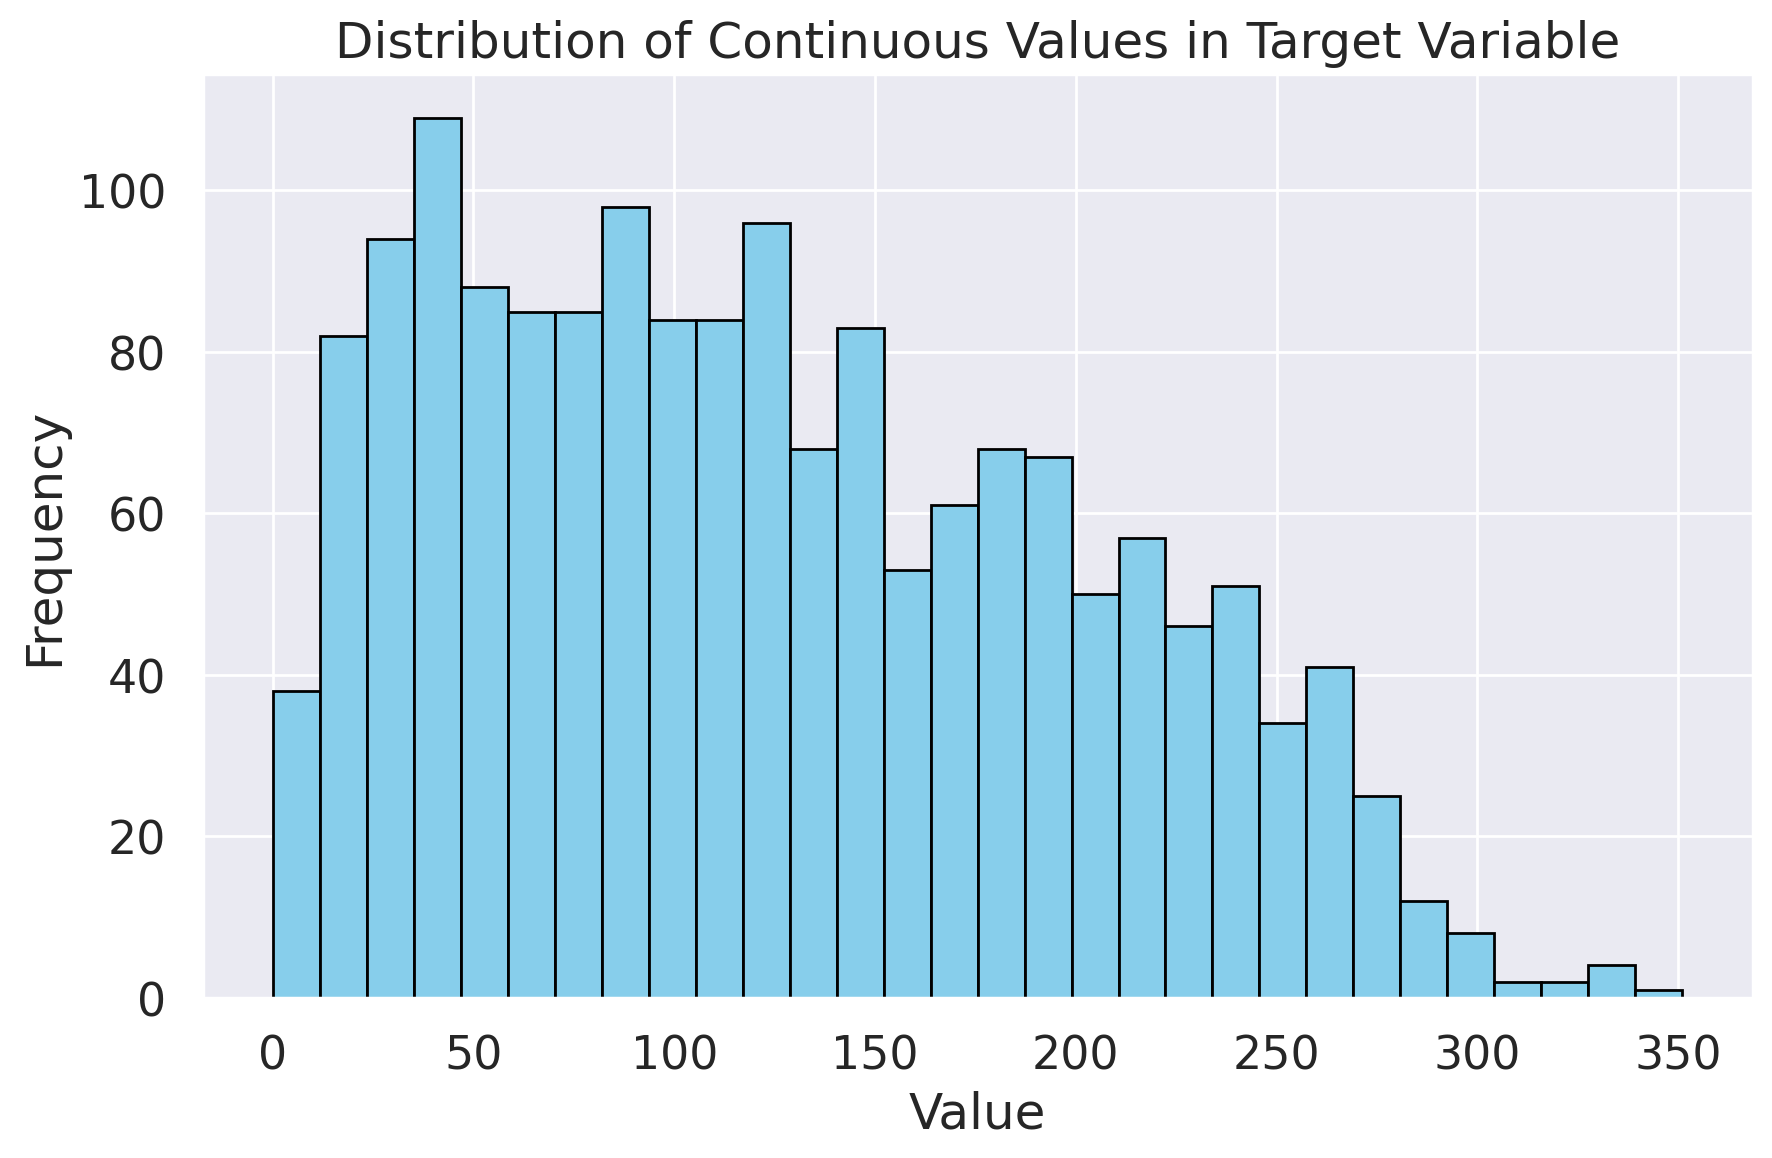

In [ ]:
import matplotlib.pyplot as plt

target_column = df.columns[21]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df[target_column], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Continuous Values in Target Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Training model and calculating accuracy metrics for regression task (R-squared and RMSE)

In [ ]:
target_variable = df.columns[21]

# Split the data into features and target variable
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest Regression
rf_reg_model = RandomForestRegressor(random_state=42)
rf_reg_model.fit(X_train, y_train)
rf_reg_y_pred = rf_reg_model.predict(X_test)
rf_reg_r2 = r2_score(y_test, rf_reg_y_pred)
rf_reg_mse = mean_squared_error(y_test, rf_reg_y_pred)
rf_reg_rmse = np.sqrt(rf_reg_mse)

# Lasso Regression
lasso_reg_model = Lasso(random_state=42)
lasso_reg_model.fit(X_train, y_train)
lasso_reg_y_pred = lasso_reg_model.predict(X_test)
lasso_reg_r2 = r2_score(y_test, lasso_reg_y_pred)
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_y_pred)
lasso_reg_rmse = np.sqrt(lasso_reg_mse)


print("\nRandom Forest Regression:")
print("R2 Score:", rf_reg_r2)
print("Mean Squared Error:", rf_reg_mse)
print("Root Mean Squared Error:", rf_reg_rmse)

print("\nLasso Regression:")
print("R2 Score:", lasso_reg_r2)
print("Mean Squared Error:", lasso_reg_mse)
print("Root Mean Squared Error:", lasso_reg_rmse)



Random Forest Regression:
R2 Score: 0.4927059820176446
Mean Squared Error: 3007.998421286307
Root Mean Squared Error: 54.84522241076525

Lasso Regression:
R2 Score: 0.29180311132246706
Mean Squared Error: 4199.251415529185
Root Mean Squared Error: 64.80163127213068


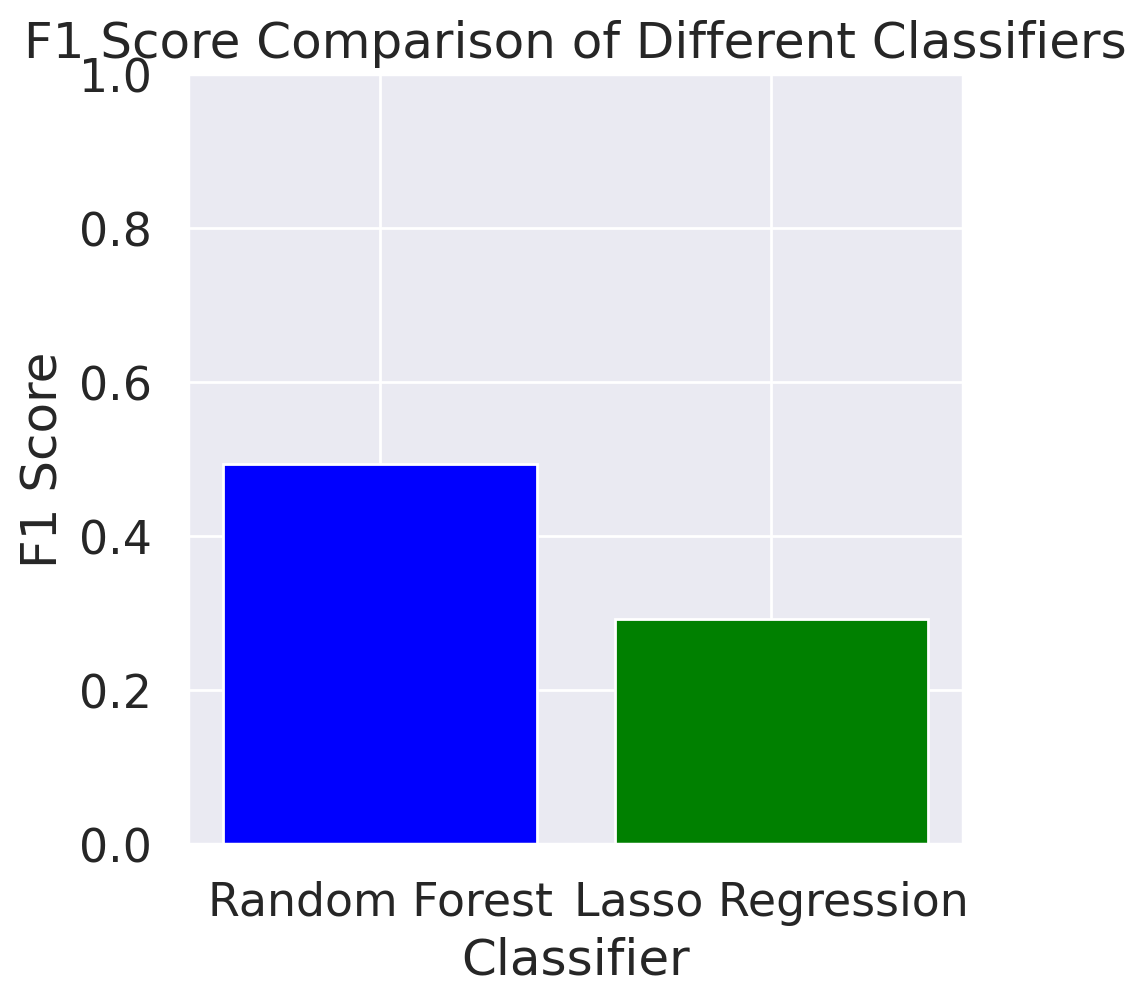

In [ ]:
# Create a plot
classifiers = ['Random Forest', 'Lasso Regression']
f1_scores = [rf_reg_r2, lasso_reg_r2]

plt.figure(figsize=(5, 5))
plt.bar(classifiers, f1_scores, color=['blue', 'green'])
plt.title('F1 Score Comparison of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.show()

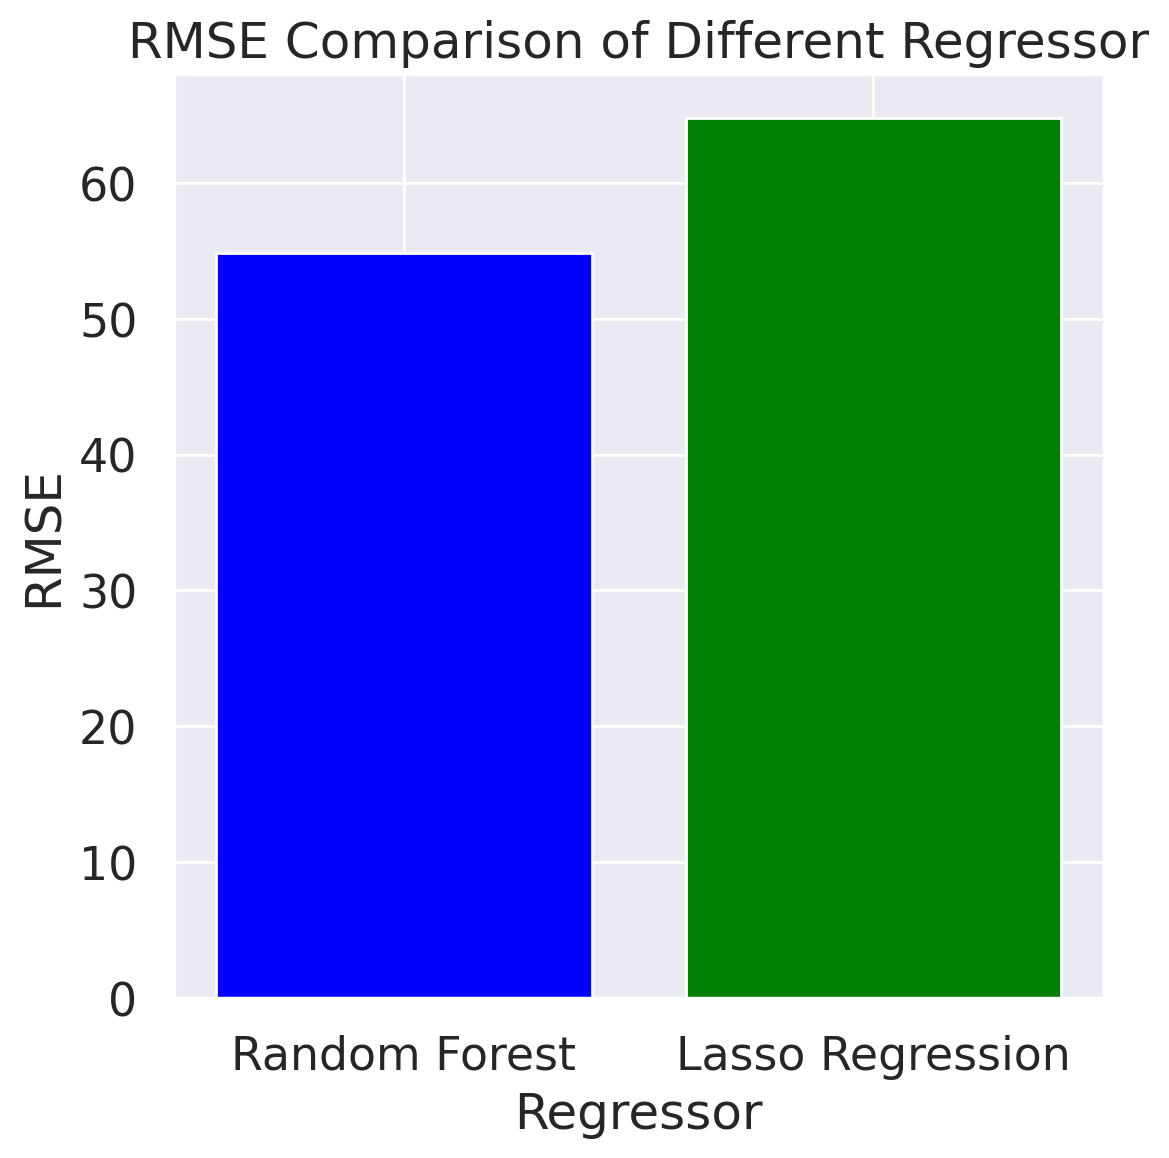

In [ ]:
# Create a plot
classifiers = ['Random Forest', 'Lasso Regression']
f1_scores = [rf_reg_rmse, lasso_reg_rmse]

plt.figure(figsize=(6, 6))
plt.bar(classifiers, f1_scores, color=['blue', 'green'])
plt.title('RMSE Comparison of Different Regressor')
plt.xlabel('Regressor')
plt.ylabel('RMSE')
plt.show()